<a href="https://colab.research.google.com/github/AnusreeMandal/melbourne_housingprice/blob/main/softcomputingass1_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/melb_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#This dataset has certain missing values in some sections like building year, building area.Our next step will be to handle these missing values


In [5]:

data['Car'].fillna(data['Car'].median(), inplace=True)


data['BuildingArea'].fillna(data['BuildingArea'].median(), inplace=True)


data['YearBuilt'].fillna(data['YearBuilt'].median(), inplace=True)


data['CouncilArea'].fillna(data['CouncilArea'].mode()[0], inplace=True)

print(data.isnull().sum())


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


Now our task is to select some usefull attributes that would help us to predict car price


In [6]:

selected_features = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']
X = data[selected_features]
y = data['Price']


X = pd.get_dummies(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler


numeric_cols = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


scaler = StandardScaler()

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


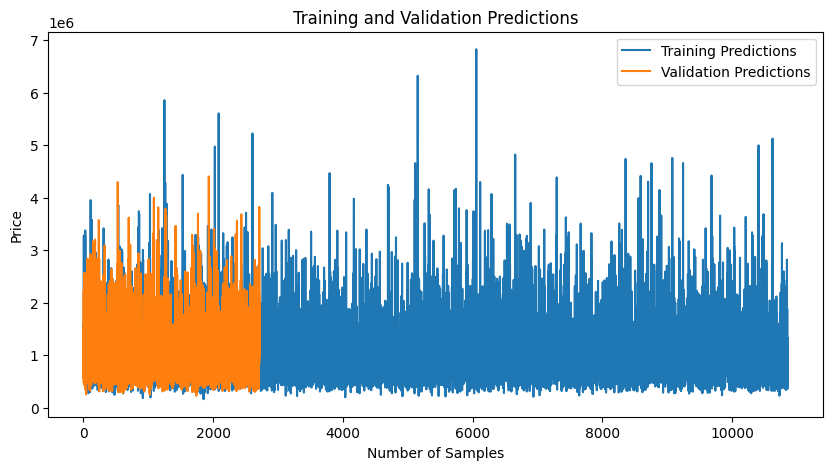

Training Loss (MSE): 12178928977.905275
Validation Loss (MSE): 73905473178.44269


In [9]:
# Developing and evaluating the model
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

train_loss = mean_squared_error(y_train, model.predict(X_train))
val_loss = mean_squared_error(y_test, y_pred)


plt.figure(figsize=(10, 5))
plt.plot(range(len(y_train)), model.predict(X_train), label='Training Predictions')
plt.plot(range(len(y_test)), y_pred, label='Validation Predictions')
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Training and Validation Predictions')
plt.legend()
plt.show()

print(f'Training Loss (MSE): {train_loss}')
print(f'Validation Loss (MSE): {val_loss}')


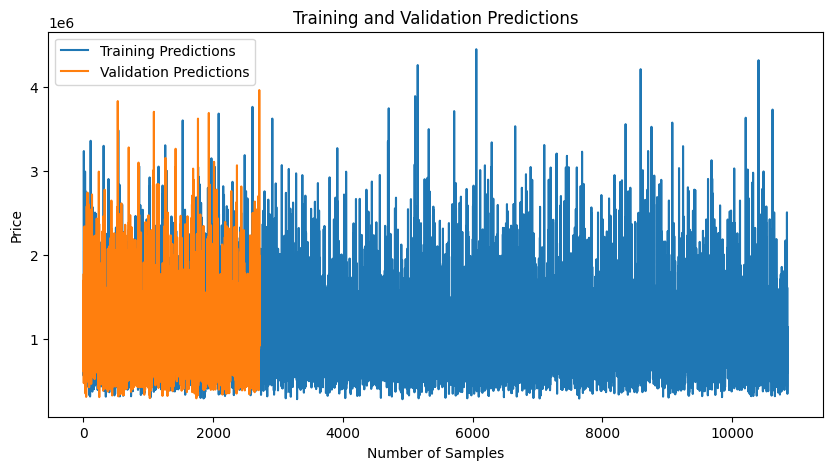

Training Loss (MSE): 79152888666.5995
Validation Loss (MSE): 88627467252.51527


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    random_state=42
)


model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


train_loss = mean_squared_error(y_train, model.predict(X_train))
val_loss = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_train)), model.predict(X_train), label='Training Predictions')
plt.plot(range(len(y_test)), y_pred, label='Validation Predictions')
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Training and Validation Predictions')
plt.legend()
plt.show()

print(f'Training Loss (MSE): {train_loss}')
print(f'Validation Loss (MSE): {val_loss}')


The adjusted model shows a reduced discrepancy between the training and validation losses compared to the initial model.